# Link prediction

In [16]:
%pip install networkx
%pip install node2vec

Note: you may need to restart the kernel to use updated packages.
  Using cached node2vec-0.4.3.tar.gz (4.6 kB)
     |████████████████████████████████| 24.1 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.7 MB/s eta 0:00:01
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=4c20b183013c3b8b17161666b2f4f7692400fbc20262289fecfb094417db6c92
  Stored in directory: /home/thiago/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec
Note: you may need to restart the kernel to use updated packages.


Número de nós : 34
Número de arestas : 78
Número de componentes conectados : 1


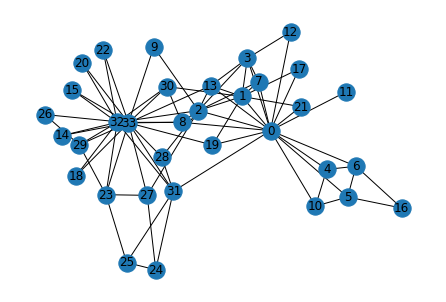

In [3]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt


G_karate = nx.karate_club_graph()

pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Número de nós : %d" % n)
print("Número de arestas : %d" % m)
print("Número de componentes conectados : %d" % nx.number_connected_components(G_karate))



In [4]:
# Remove 20% das arestas
proportion_edges = 0.2
edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

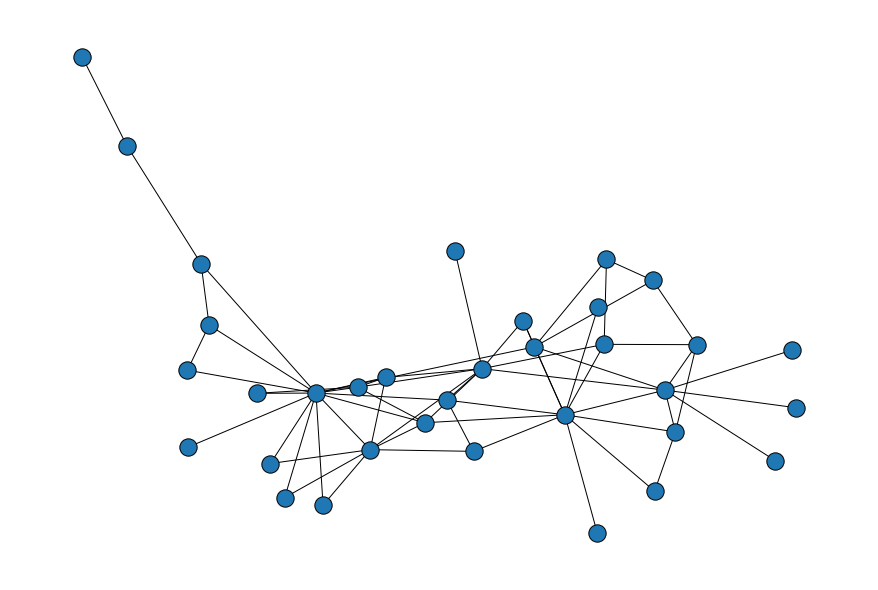

In [9]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000") 


In [11]:
edge_subset_size = len(list(edge_subset))
print("Número de arestas removidas : %d" % edge_subset_size)
print("Número de arestas restantes : %d" % (m - edge_subset_size))

Número de arestas removidas : 15
Número de arestas restantes : 63


## Jaccard coefficient

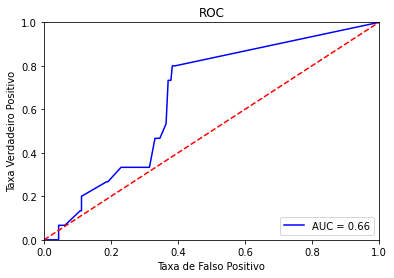

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Fazendo previsões com o jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))

score_jaccard = [s for (u,v,s) in pred_jaccard]
label_jaccard = [(u,v) in edge_subset for (u,v,s) in pred_jaccard]


# Computa o AUC score da curva ROC
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_jaccard, tpr_jaccard, 'b', label = 'AUC = %0.2f' % auc_jaccard)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()


## Preferential Attachment

0.7374051069703245


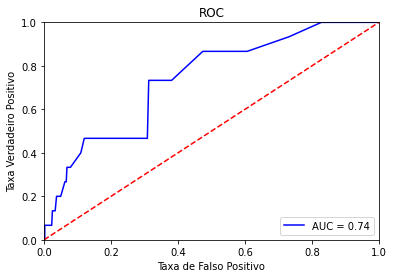

In [13]:
pred_prefAtch = list(nx.preferential_attachment(G_karate_train))

score_prefAtch = [s for (u,v,s) in pred_prefAtch]

label_prefAtch = [(u,v) in edge_subset for (u,v,s) in pred_prefAtch]

# Computa o AUC score da curva ROC
fpr_prefAtch, tpr_prefAtch, _ = metrics.roc_curve(label_prefAtch, score_prefAtch)
auc_prefAtch = roc_auc_score(label_prefAtch, score_prefAtch)
print(auc_prefAtch)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_prefAtch, tpr_prefAtch, 'b', label = 'AUC = %0.2f' % auc_prefAtch)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

## Resource Allocation

0.7766735679779159


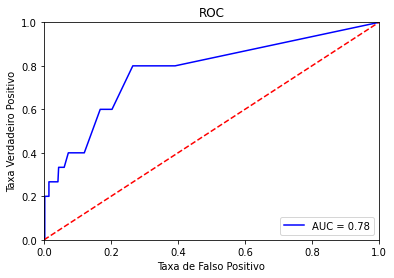

In [14]:
pred_ra = list(nx.resource_allocation_index(G_karate_train))

score_ra = [s for (u,v,s) in pred_ra]

label_ra = [(u,v) in edge_subset for (u,v,s) in pred_ra]

# Computa o AUC score da curva ROC
fpr_ra, tpr_ra, _ = metrics.roc_curve(label_ra, score_ra)
auc_ra = roc_auc_score(label_ra, score_ra)
print(auc_ra)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_ra, tpr_ra, 'b', label = 'AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()



## Common Neighbor Centrality

0.7536922015182885


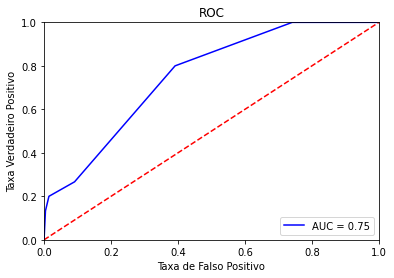

In [16]:
## Esta implementação depende do Networkx 2.6 que roda somente no python 3.7. Nesta máquina está com python 3.5

pred_CNC = list(nx.common_neighbor_centrality(G_karate_train))

score_CNC = [s for (u,v,s) in pred_CNC]

label_CNC= [(u,v) in edge_subset for (u,v,s) in pred_CNC]


fpr_CNC, tpr_CNC, _ = metrics.roc_curve(label_CNC, score_CNC)
auc_CNC = roc_auc_score(label_CNC, score_CNC)
print(auc_CNC)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_CNC, tpr_CNC, 'b', label = 'AUC = %0.2f' % auc_CNC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

## Adamic-Adar

0.7763975155279503


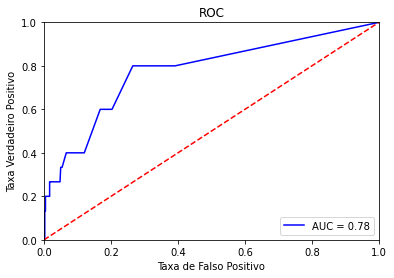

In [17]:
pred_adamic = list(nx.adamic_adar_index(G_karate_train))

score_adamic = [s for (u,v,s) in pred_adamic]

label_adamic = [(u,v) in edge_subset for (u,v,s) in pred_adamic]

fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
print(auc_adamic)


#Gráfico da curva ROC
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'AUC = %0.2f' % auc_adamic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

### Todas as ROC

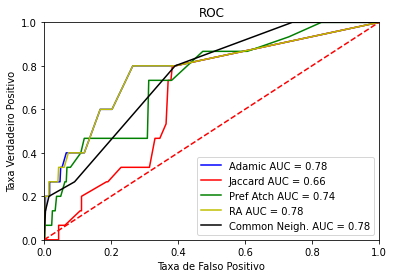

In [22]:
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'Adamic AUC = %0.2f' % auc_adamic)
plt.plot(fpr_jaccard, tpr_jaccard, 'r', label = 'Jaccard AUC = %0.2f' % auc_jaccard)
plt.plot(fpr_prefAtch, tpr_prefAtch, 'g', label = 'Pref Atch AUC = %0.2f' % auc_prefAtch)
plt.plot(fpr_ra, tpr_ra, 'y', label = 'RA AUC = %0.2f' % auc_ra)
plt.plot(fpr_CNC, tpr_CNC, 'k', label = 'Common Neigh. AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

# Predição de links da rede do Facebook

In [23]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#!pip install scikit-learn  -U


G_facebook = nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(), nodetype = int)
print(nx.info(G_facebook))

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/91/4e/752fd6e0b6b828a9cd815941fb70723eaef5d0f4efd8b9b0eee7864b3511/scikit_learn-1.3.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:01:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [24]:
A = nx.adjacency_matrix(G_facebook)
A.shape

(4039, 4039)

### Pegar todas as possibilidades de pares não conectados

In [25]:
# para guardar todos os pares de nós não conectados 
listUnconnected = []

# Varre a matriz de adjacência procurando por pares desconectados
offset = 0
for i in tqdm(range(A.shape[0])):
    for j in range(offset,A.shape[1]):
        if i != j:
            if A[i,j] == 0:
                listUnconnected.append([i,j])

    offset +=1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4039/4039 [02:31<00:00, 26.66it/s]


In [26]:
unlinked1 = [i[0] for i in listUnconnected]
unlinked2 = [i[1] for i in listUnconnected]

dfPairs = pd.DataFrame({'node1':unlinked1, 
                     'node2':unlinked2})

# cria a variável 'link', onde 0= sem link e 1 com link
dfPairs['link'] = 0
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
8066502,4035,4037,0
8066503,4035,4038,0
8066504,4036,4037,0
8066505,4036,4038,0


### Removendo arestas do grafo original

In [27]:
prop = 0.2
edge_subset = random.sample(G_facebook.edges(), int(prop * G_facebook.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_facebook_train = G_facebook.copy()
G_facebook_train.remove_edges_from(edge_subset)


In [28]:
df = pd.DataFrame(edge_subset, columns=['node1', 'node2'])
df['link'] = 1

dfPairs = dfPairs.append(df)
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
17641,1966,2124,1
17642,2370,2646,1
17643,1550,1573,1
17644,2129,2181,1


### Node embeddings com o node2vec

In [29]:
from node2vec import Node2Vec

# Gera caminhos 
node2vec = Node2Vec(G_facebook_train, dimensions=100, walk_length=16, num_walks=50)

# treina o modelo node2vec
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:52<00:00,  2.26s/it]


In [31]:
#representa as arestas pela soma dos embeddings dos nós
featuresPares = [(n2w_model.wv[str(i)]+n2w_model.wv[str(j)]) for i,j in zip(dfPairs['node1'], dfPairs['node2'])]

### Separação dos dados para treino e teste

In [32]:

                                                #X                      #y
xtrain, xtest, ytrain, ytest = train_test_split(np.array(featuresPares), dfPairs['link'], 
                                                test_size = 0.3, 
                                                random_state = 10)

### Teste com uma regressão logística

In [33]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

### Fazendo predições

In [34]:
predictions = lr.predict_proba(xtest)

### AUC

In [35]:
roc_auc_score(ytest, predictions[:,1])

0.7584908881247727

### Accurácia e F1 score

In [48]:
from sklearn.metrics import f1_score, accuracy_score


predicao = (predictions[:,1]>=.5).astype(int)

print(accuracy_score(ytest, predicao))
print(f1_score(ytest, predicao))

0.698224015213302
0.01008203317846443


## Teste com o LightGBM 

In [11]:
%pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-manylinux1_x86_64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import lightgbm as lgb


train_data = lgb.Dataset(xtrain, label=ytrain)
test_data = lgb.Dataset(xtest, label=ytest)

param = {'objective': 'binary', 'metric':'auc'}

num_round = 100


In [39]:
bst = lgb.train(param, train_data, num_round)

[LightGBM] [Info] Number of positive: 12361, number of negative: 5646546
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.581114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 5658907, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002184 -> initscore=-6.124253
[LightGBM] [Info] Start training from score -6.124253


In [41]:
ypred = bst.predict(xtest)
roc_auc_score(ytest, ypred)


0.9015622195592456

### Acurácia e F1 score

In [46]:
predicao = (ypred>=.5).astype(int)

print(accuracy_score(ytest, predicao))
print(f1_score(ytest, predicao))

0.9969161891206088
0.028322723138885283
